# Question 4: Demographics

Describe the demographics and chronic conditions of our population by year. Similar to descriptive work performed during the first term. The denominator is all the unique HCAs in our plans, including non-users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
med = pd.read_csv('../../data/reshaped_med.csv')
enroll = pd.read_csv('../../data/enroll.csv')

## Gender

In [140]:
gender = enroll['Member Gender'].value_counts()
print(gender)

F    81389
M    16988
U        5
Name: Member Gender, dtype: int64


Let's proceed with gender unknowns **U** removed in this section

In [62]:
gender_count = enroll.groupby(['Incurred Year', 'Member Gender']).size().reset_index(name='total')
gender_count = gender_count[gender_count['Member Gender'] != 'U']
# reformat years for no decimals in visuals
gender_count.loc[:,'Incurred Year'] = ['2016', '2016', '2017', '2017', '2018', '2018']
gender_count

,Incurred Year,Member Gender,total
0,2016,F,26976
1,2016,M,5452
3,2017,F,28348
4,2017,M,5862
5,2018,F,26065
6,2018,M,5674


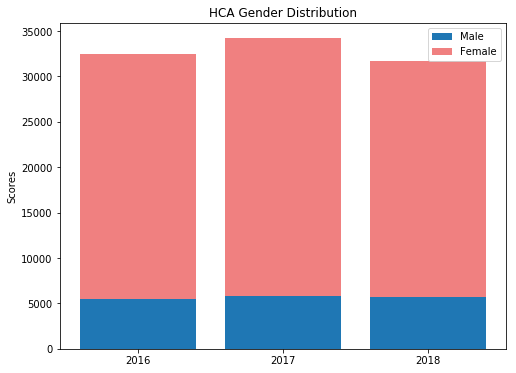

In [63]:
male = gender_count[gender_count['Member Gender'] == 'M']
female = gender_count[gender_count['Member Gender'] == 'F']

fig = plt.figure(figsize = (8, 6))
p1 = plt.bar(male['Incurred Year'], male['total'], color = 'tab:blue')
p2 = plt.bar(male['Incurred Year'], female['total'], bottom = male['total'], color = 'lightcoral')

plt.ylabel('Scores')
plt.title('HCA Gender Distribution')
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.show()

## Age

First, what is the range of HCA ages? Does it make sense? Let's look:

In [89]:
print('Lowest 10 ages:')
print(enroll.sort_values('Age').head(10).Age.to_string(index=False))

Lowest 10 ages:
0
0
0
0
0
0
0
1
1
1


In [87]:
print('Highest 10 ages:')
print(enroll.sort_values('Age', ascending=False).head(10).Age.to_string(index=False))

Highest 10 ages:
255
255
255
255
103
 93
 91
 90
 90
 90


A lot of these don't look right at all! Let's first filter the data for this section to only keep ages within the range **18 - 103** years.

In [106]:
ages = enroll[(enroll['Age'] >= 18) & (enroll['Age'] <= 103)]

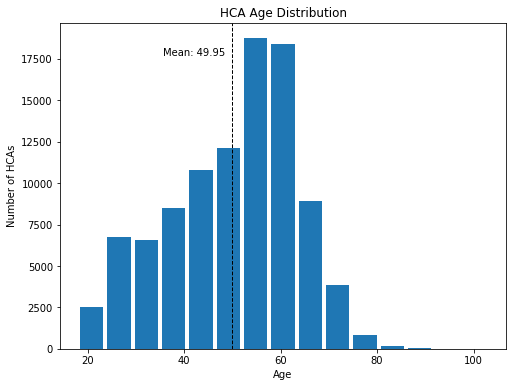

In [139]:
fig = plt.figure(figsize = (8, 6))
plt.hist(ages.Age, bins = 15, rwidth= 0.85, color='tab:blue')

# Add mean line
plt.axvline(ages.Age.mean(), color='k', linestyle='dashed', linewidth=1)
# Add mean line text
_, max_ = plt.ylim()
plt.text(ages.Age.mean() - ages.Age.mean()/3.5, 
         max_ - max_/10,
         'Mean: {:.2f}'.format(ages.Age.mean()))

plt.title('HCA Age Distribution')
plt.xlabel("Age")
plt.ylabel("Number of HCAs")
plt.show()